In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm

# Getting data
the data about all scaffolds is too big for my laptop so I read out only the first part, which includes the whole scaffold 13

# Function: Joining contigs and creating final txt

In [2]:
# firstly, let's create a txt file with joined contigs

def creating_txt(good_lines, name_of_scaffold, name_of_mushroom):
    data = good_lines[name_of_scaffold]
    res = []
    
    for line in data:
        if re.search(name_of_mushroom, line[1]) != None:
            res.append(line)

    name_of_file = name_of_scaffold + name_of_mushroom + '.txt'
    
    f = open(name_of_file, "w") # not joined contigs
    for item in res:
        f.write("%s\n" % item)
    f.close()
    return(res)

In [3]:

def calculating_numbers(name_of_scaffold, name_of_mushroom, st, end):
    with open("tba_ref_ordered.maf") as fin:
        fin.seek(st)
        data = fin.read(end)
        f = open("data.txt", "w")
        f.write(data)
        f.close()


    data = data.split('\n')
    lines = []
    pos_start = 0
    for x in data:
        lines.append(x.split())
    good_lines = {}
    lines = [x for x in lines if x != []] 
    for i in range(len(lines)):
        if lines[i][0] == 'a':
            scaf_name = lines[i+1][1]
            pos_start, length = lines[i+1][2], lines[i+1][3]
            if scaf_name not in good_lines.keys():
                good_lines[scaf_name] = []
        else:
            if pos_start != 0:
                lines[i].append(pos_start)
                lines[i].append(length)
                good_lines[scaf_name].append(lines[i])
#     for line in good_lines:
#         print(line)


    res = []
    res = creating_txt(good_lines, name_of_scaffold, name_of_mushroom)
    #print(res[0:200])


    df = pd.DataFrame(res, columns = ['s', 'contig', 'start coordinate in a contig', 'length of a part of a contig',
                                      'direction', 'lenght of a whole contig', 'sequence', 'start', 'length'])
    df['length'] = df['length'].astype(int)
    df['start'] = df['start'].astype(int)
    df = df[df.length > 100]
    df.sort_values('start')    
    df.head()
    contigs = df['contig'].tolist()


    def creating_lists_of_names(contigs):
        names = []
        names.append(contigs[0])
        for i in range(len(contigs)):
            if contigs[i] != names[-1]:
                names.append(contigs[i])
        return names

    names = creating_lists_of_names(contigs)
    # print(names)
    # searching names that are alligned in more than one place

    def searching(names):
        repeating_contigs = {}
        reps = {i:names.count(i) for i in names}
        for key in reps:
            if reps[key] != 1:
                repeating_contigs[key] = reps[key]
                #print(key, reps[key])
        return repeating_contigs


    reps = searching(names)

    def searching_inversions(contigs):
        signs = {}
        inversed_contigs = []

        for x in res:
            if x[1] not in signs.keys():
                signs[x[1]] = x[4]
            else:
                if signs[x[1]] != x[4]:
                    inversed_contigs.append(x[1])
        return list(set(inversed_contigs))

    inversed_contigs = searching_inversions(contigs)
    #print(names[:10])
    print(name_of_scaffold, name_of_mushroom,)
    print ('rearrangements', sum(reps.values()) - len(reps.keys()))
    print('inversions ', len(inversed_contigs))  
    #print(reps)
    return reps, res, inversed_contigs


In [4]:
name_of_scaffold = 'ref.scaffold13'
name_of_mushroom = 'A10' # A10 or M2

reps, res, inversed_contigs = calculating_numbers(name_of_scaffold, name_of_mushroom, 33, 100000000)


ref.scaffold13 A10
rearrangements 13
inversions  19


[[6288, 6364, 'A10.contig306'], [6377, 6534, 'A10.contig306'], [6534, 6598, 'A10.contig306'], [6598, 6658, 'A10.contig306'], [6659, 6697, 'A10.contig306'], [6697, 6724, 'A10.contig306'], [6724, 6771, 'A10.contig306'], [8201, 8211, 'A10.contig306'], [8212, 8230, 'A10.contig306'], [8236, 8254, 'A10.contig306'], [8254, 8389, 'A10.contig306'], [8447, 8642, 'A10.contig306'], [8642, 8662, 'A10.contig306'], [8662, 8674, 'A10.contig306'], [8674, 8694, 'A10.contig306'], [11807, 11822, 'A10.contig306'], [11834, 11860, 'A10.contig306'], [11860, 11901, 'A10.contig306'], [11901, 11955, 'A10.contig306'], [11955, 11975, 'A10.contig306'], [11976, 11981, 'A10.contig306'], [11981, 11994, 'A10.contig306'], [11994, 12018, 'A10.contig306'], [12018, 12041, 'A10.contig306'], [12041, 12100, 'A10.contig306'], [12102, 12139, 'A10.contig306'], [12139, 12230, 'A10.contig306'], [12230, 12376, 'A10.contig306'], [12376, 12444, 'A10.contig306'], [12444, 12500, 'A10.contig306'], [13231, 13299, 'A10.contig306'], [13376

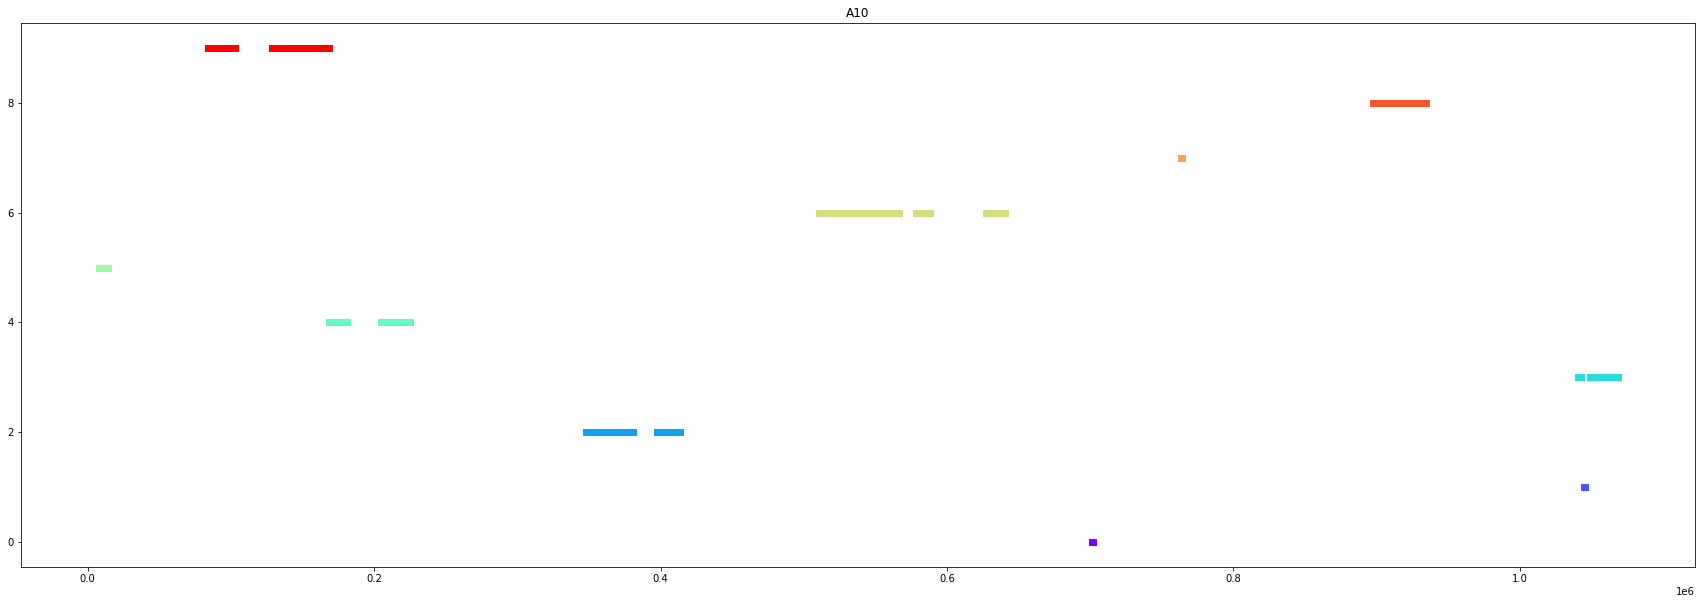

In [5]:
coordinates = []

for name in reps.keys():
    for x in res:
        if name == x[1]:
            coordinates.append([int(x[-2]), int(x[-2]) + int(x[-1]), name])

print(coordinates)

plt.figure(figsize=(30, 10))
colors_r = cm.rainbow(np.linspace(0, 1, len(set(reps.keys()))))

colors = {}
height = {}
i = 0
for name in set(reps.keys()):
    colors[name] = colors_r[i]
    height[name] = i
    i +=1
    
for i in range(len(coordinates)):
    plt.plot(coordinates[i][:2], [height[coordinates[i][2]], height[coordinates[i][2]]], color = colors[coordinates[i][2]], linewidth=7) 
plt.title(name_of_mushroom)
#plt.axis('off')
plt.show()  

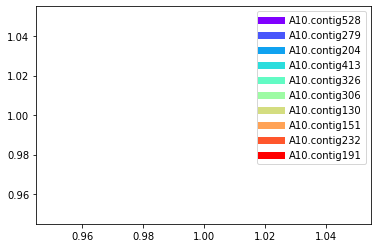

In [6]:
set_of_names = set(reps.keys())
for x in set_of_names:
    plt.plot(1,1, color = colors[x], linewidth=7.0, label = x)
plt.legend()
plt.show()

In [7]:
maxim = 0

for x in res:
    maxim = max(maxim, int(x[-2]))
print(maxim)

1192224


# Searching inversions

In [8]:

def searching_inversions(contigs):
    signs = {}
    inversed_contigs = []

    for x in res:
        if x[1] not in signs.keys():
            signs[x[1]] = x[4]
        else:
            if signs[x[1]] != x[4]:
                inversed_contigs.append(x[1])
    return list(set(inversed_contigs))

inversed_contigs = searching_inversions(contigs)
    
    
    
    

NameError: name 'contigs' is not defined

# Showing inversions

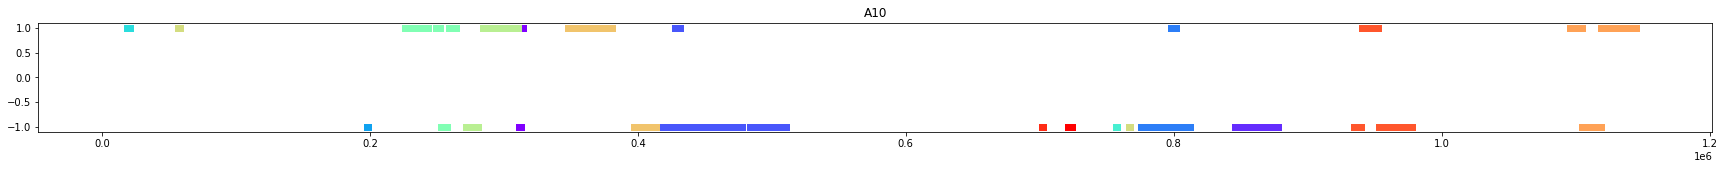

In [17]:
coordinates = []
height = []

for name in inversed_contigs:
    for x in res:
        if name == x[1]:
            coordinates.append([int(x[-2]), int(x[-2]) + int(x[-1]), name])
            if x[4] == '-':
                height.append(-1)
            else:
                height.append(1)
            

#print(coordinates)

plt.figure(figsize=(30, 2))
colors_r = cm.rainbow(np.linspace(0, 1, len(inversed_contigs)))

colors = {}
i = 0
for name in inversed_contigs:
    colors[name] = colors_r[i]
    i +=1
    
for i in range(len(coordinates)):
    plt.plot(coordinates[i][:2], [height[i], height[i]], color = colors[coordinates[i][2]], linewidth=7) 
plt.title(name_of_mushroom)
#plt.axis('off')
plt.show()  

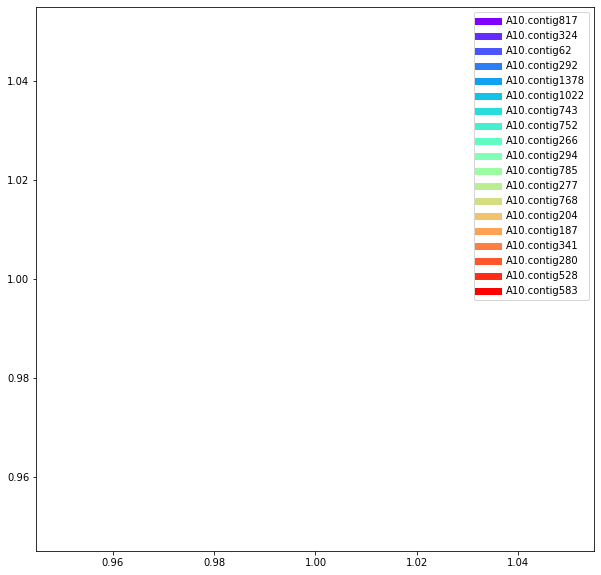

In [18]:
plt.figure(figsize=(10, 10))
set_of_names = inversed_contigs
for x in set_of_names:
    plt.plot(1,1, color = colors[x], linewidth=7.0, label = x)
plt.legend()
plt.show()